In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tpp = pd.read_csv ("C:\\Users\\zisan\\Downloads\\Exploratory projects\\Bolt\\Traffic-Pattern-Prediction\\traffic_pattern_data.csv")

In [3]:
tpp.head(5)

,ride_id,location,ride_duration_min,ride_distance_km,traffic_condition,weather_condition,ride_timestamp
0,19b1cc2f-c3e3-47fe-90ca-34659607baba,Vilnius,42.78,27.10,Low,Rainy,2025-01-01 11:28:40
1,0cb88b96-62de-4484-8036-327ec4ecb365,Zurich,10.12,48.14,Low,Cloudy,2025-01-02 07:55:00
2,e183628c-0159-4839-ba0d-657f7e6c93b9,Vienna,6.62,6.36,High,Cloudy,2025-01-01 00:47:38
3,1ca29f57-c36f-4448-9b8e-308023a2c00f,Paris,50.26,44.83,High,Cloudy,2025-01-02 16:05:47
4,e4640f6e-1306-4329-83ec-0e737d6560a5,Warsaw,16.54,49.58,Medium,Clear,2025-01-02 10:46:47


In [5]:
tpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ride_id            1000 non-null   object 
 1   location           1000 non-null   object 
 2   ride_duration_min  1000 non-null   float64
 3   ride_distance_km   1000 non-null   float64
 4   traffic_condition  1000 non-null   object 
 5   weather_condition  1000 non-null   object 
 6   ride_timestamp     1000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [6]:
tpp.describe()

,ride_duration_min,ride_distance_km
count,1000.000000,1000.000000
mean,32.867720,25.314410
std,16.028099,13.978096
min,5.010000,1.020000
25%,18.692500,12.607500
50%,33.920000,25.770000
75%,46.780000,37.550000
max,59.980000,49.860000


In [9]:
tpp.isnull().sum()

ride_id              0
location             0
ride_duration_min    0
ride_distance_km     0
traffic_condition    0
weather_condition    0
ride_timestamp       0
dtype: int64

In [ ]:
# Ride Duration vs. Ride Distance: How does the ride duration correlate with the ride distance across different locations? Is there a linear relationship?

In [7]:
corr_matrix = tpp[["ride_duration_min", "ride_distance_km"]].corr()

In [8]:
corr_matrix

,ride_duration_min,ride_distance_km
ride_duration_min,1.000000,0.014893
ride_distance_km,0.014893,1.000000


In [ ]:
# Traffic Conditions and Ride Duration: How does traffic condition (Low, Medium, High) affect the ride duration? Are rides in high traffic taking significantly longer than in low traffic?

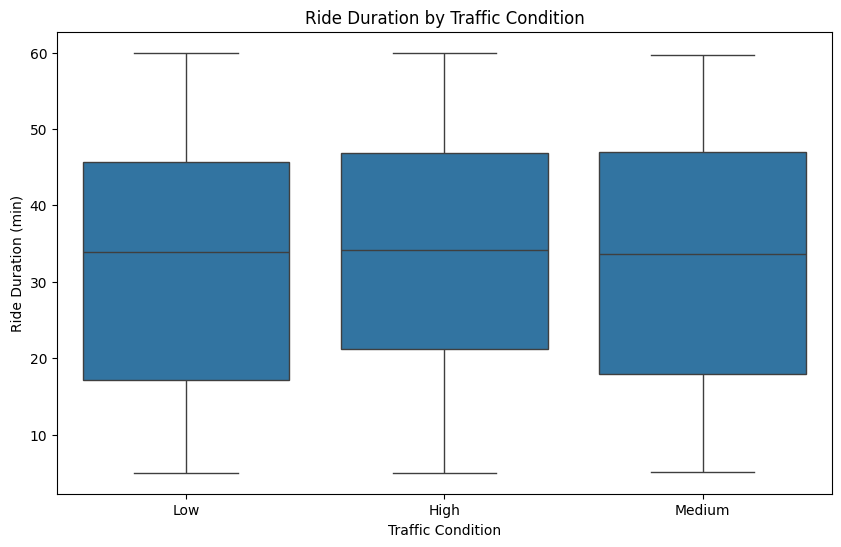

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='traffic_condition', y='ride_duration_min', data=tpp)
plt.title('Ride Duration by Traffic Condition')
plt.xlabel('Traffic Condition')
plt.ylabel('Ride Duration (min)')
plt.show()


In [ ]:
# Longest and Shortest Rides: What are the longest and shortest rides in terms of duration and distance? How do the traffic and weather conditions compare for these extreme rides?

In [13]:
longest = tpp.loc[tpp["ride_duration_min"].idxmax()]
shortest = tpp.loc[tpp["ride_duration_min"].idxmin()]

In [14]:
longest 

ride_id              f7157116-8cea-4412-98b5-cea41a4b9996
location                                           Prague
ride_duration_min                                   59.98
ride_distance_km                                    39.98
traffic_condition                                     Low
weather_condition                                   Rainy
ride_timestamp                        2025-01-02 07:56:20
Name: 324, dtype: object

In [15]:
shortest

ride_id              b0f82b3c-ad31-4358-b7ee-1e516ebe9771
location                                          Vilnius
ride_duration_min                                    5.01
ride_distance_km                                     3.84
traffic_condition                                     Low
weather_condition                                  Cloudy
ride_timestamp                        2025-01-01 19:55:19
Name: 61, dtype: object

In [ ]:
# Ride Duration Based on Traffic: What is the combined effect of traffic conditions on ride duration? Is there an interaction between these factors?

In [22]:
rdbot = tpp.groupby("traffic_condition")["ride_duration_min"].mean()
rdbot1 = rdbot.sort_values(ascending =False)

In [23]:
rdbot1

traffic_condition
High      33.456236
Medium    32.874249
Low       32.191046
Name: ride_duration_min, dtype: float64

In [ ]:
# Ride Duration Based on weather: What is the combined effect of weather conditions on ride duration? Is there an interaction between these factors?

In [25]:
rdbow = tpp.groupby("weather_condition")["ride_duration_min"].mean()

In [26]:
rdbow2= rdbow.sort_values(ascending =False)

In [27]:
rdbow2

weather_condition
Cloudy    34.213473
Snowy     32.868040
Clear     32.178775
Rainy     32.108723
Name: ride_duration_min, dtype: float64

In [ ]:
# City-specific Ride Trends: What are the average ride durations and distances for each city in the dataset? Which city has the longest average ride duration?

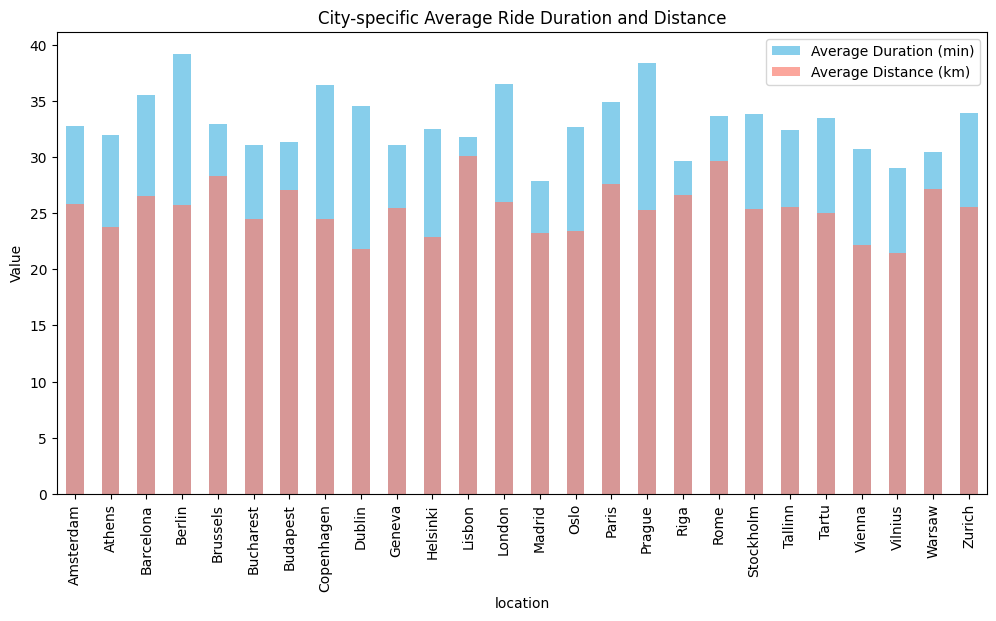

In [29]:
city_avg_duration = tpp.groupby('location')['ride_duration_min'].mean()
city_avg_distance = tpp.groupby('location')['ride_distance_km'].mean()

plt.figure(figsize=(12, 6))
city_avg_duration.plot(kind='bar', color='skyblue', label='Average Duration (min)')
city_avg_distance.plot(kind='bar', color='salmon', label='Average Distance (km)', alpha=0.7)
plt.title('City-specific Average Ride Duration and Distance')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Traffic Condition Impact by Location: Does traffic condition have a more significant impact on ride duration in certain locations? For example, does high traffic in Zurich cause more delay than in other cities?

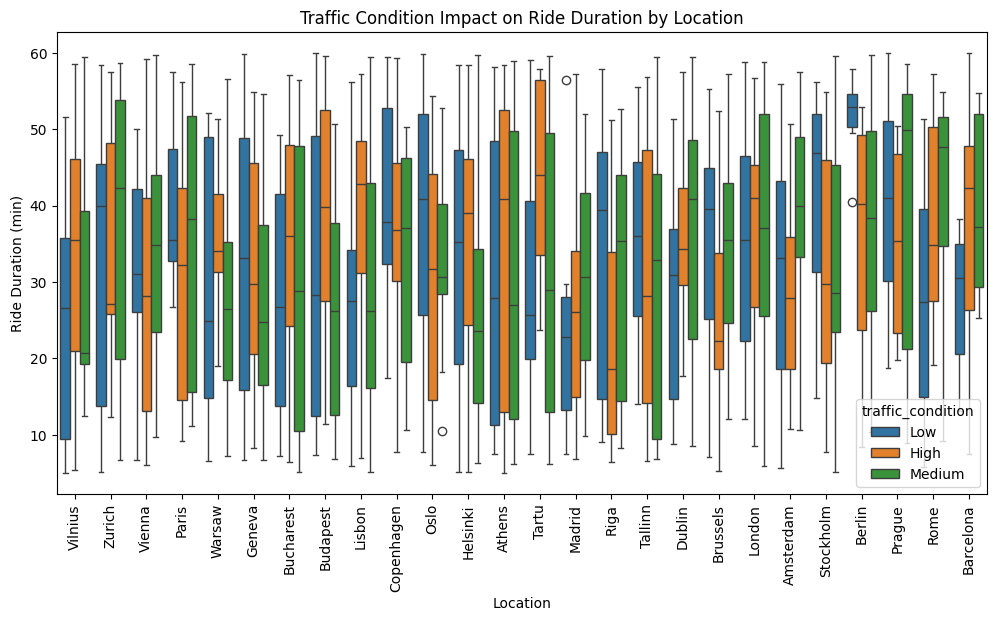

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='ride_duration_min', hue='traffic_condition', data=tpp)
plt.title('Traffic Condition Impact on Ride Duration by Location')
plt.xlabel('Location')
plt.ylabel('Ride Duration (min)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Ride Duration Variability: Which city has the most variable ride durations (e.g., high standard deviation)? Is it related to the traffic or weather conditions?

In [31]:
city_std = tpp.groupby('location')['ride_duration_min'].std()

In [34]:
first5 = city_std.sort_values(ascending = False)

In [37]:
first5.head(5)

location
Athens      19.383777
Tartu       17.718689
Budapest    17.149354
Zurich      17.144471
Lisbon      17.035526
Name: ride_duration_min, dtype: float64

In [ ]:
# Traffic Condition Frequency by City: How frequently does each traffic condition occur in each city? Are there cities with mostly low traffic conditions?

In [49]:
traffic_condition_counts = tpp.groupby('location')['traffic_condition'].value_counts()


In [51]:
top_10_traffic_condition_counts = traffic_condition_counts.sort_values(   ascending = False)

In [52]:
top_10_traffic_condition_counts.head(10)

location   traffic_condition
Bucharest  High                 22
Tallinn    Low                  21
Dublin     Medium               20
Helsinki   High                 20
Tartu      Medium               20
Stockholm  Medium               20
Brussels   Low                  19
Tallinn    High                 18
Bucharest  Medium               18
Athens     High                 18
Name: count, dtype: int64

In [ ]:
#  Are there cities with mostly low traffic conditions?

In [64]:
low_traffic = tpp[tpp["traffic_condition"] == "Low"]

In [65]:
low_traffic_counts = low_traffic["location"].value_counts()

In [66]:
low_traffic_counts.head(5)

location
Tallinn      21
Brussels     19
Bucharest    17
Budapest     16
Geneva       16
Name: count, dtype: int64

In [67]:
#  Are there cities with mostly High traffic conditions?

In [68]:
high_traffic = tpp[tpp["traffic_condition"] == "High"]
high_traffic_counts = high_traffic["location"].value_counts()
high_traffic_counts.head(5)

location
Bucharest    22
Helsinki     20
Athens       18
Tallinn      18
Madrid       17
Name: count, dtype: int64

In [72]:
monthly_avg = tpp.groupby('ride_timestamp')['ride_duration_min'].mean()

In [74]:
monthly_avg.head()

ride_timestamp
2025-01-01 00:01:11    53.39
2025-01-01 00:01:53    20.61
2025-01-01 00:09:13    11.84
2025-01-01 00:10:37    51.89
2025-01-01 00:11:04    37.84
Name: ride_duration_min, dtype: float64

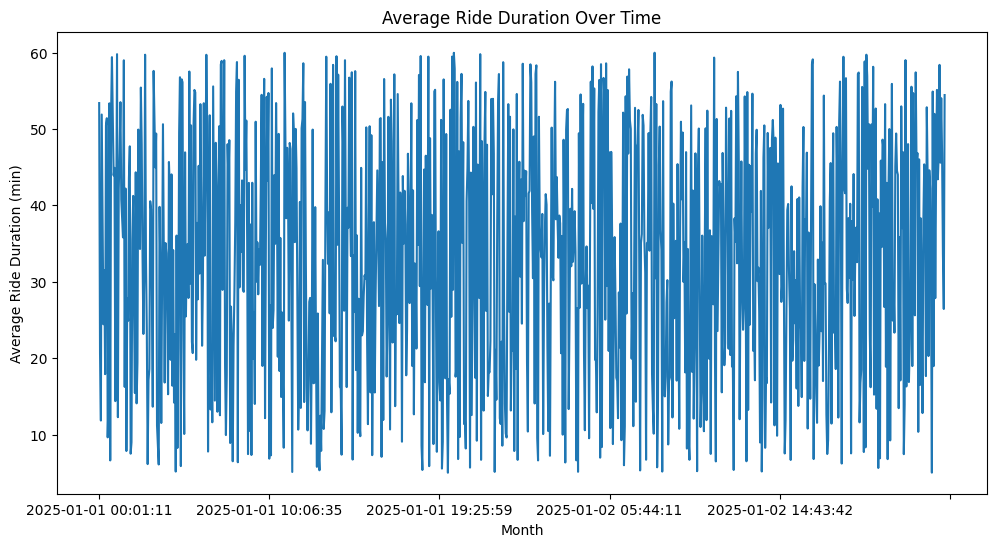

In [75]:
plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title('Average Ride Duration Over Time')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (min)')
plt.show()